We are here creating an Linear regression model to predict the Weight of the individuals based on their Height.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("height_weight_data.csv")
df.head(20)

,Height_cm,Weight_kg,Gender,Age_Group
0,174.400145,110.181847,Female,Senoir
1,163.230780,89.377853,Other,Adult
2,165.655038,80.073836,Other,Adult
3,169.544140,98.219977,Female,Senior
4,155.925362,85.004426,Male,Senior
5,183.054788,104.801072,Male,Adult
6,185.295503,102.534170,Male,Teen
7,183.071428,NaN,Other,Adult
8,NaN,84.170177,Male,Adult
9,162.262108,86.649249,Female,Adlt


In [4]:
df.dtypes

Height_cm    float64
Weight_kg    float64
Gender        object
Age_Group     object
dtype: object

In [5]:
#Checking the missing values 
df.isnull().sum()

Height_cm    25
Weight_kg    25
Gender        0
Age_Group     0
dtype: int64

In [6]:
df.describe()

,Height_cm,Weight_kg
count,978.000000,978.000000
mean,170.372680,93.719756
std,11.237977,11.662825
min,90.000000,30.000000
25%,163.623482,87.192307
50%,170.285316,93.439056
75%,176.510937,99.794873
max,300.000000,250.000000


In [7]:
#Correcting the typeo in the Age_Group colums
df["Age_Group"] = df["Age_Group"].replace(
    {
        "Adlt" : "Adult",
        "Senoir" : "Senior"
    }
)

In [8]:
#Correcting the missing values in Weight and Height depending upon the age group 

df['Weight_kg'] = df['Weight_kg'].fillna(df.groupby("Age_Group")['Weight_kg'].transform("mean"))
df['Height_cm'] = df['Height_cm'].fillna(df.groupby("Age_Group")['Height_cm'].transform("mean"))

In [9]:
df.head(10)

,Height_cm,Weight_kg,Gender,Age_Group
0,174.400145,110.181847,Female,Senior
1,163.230780,89.377853,Other,Adult
2,165.655038,80.073836,Other,Adult
3,169.544140,98.219977,Female,Senior
4,155.925362,85.004426,Male,Senior
5,183.054788,104.801072,Male,Adult
6,185.295503,102.534170,Male,Teen
7,183.071428,93.798114,Other,Adult
8,170.286123,84.170177,Male,Adult
9,162.262108,86.649249,Female,Adult


In [10]:
df.isnull().sum()

Height_cm    0
Weight_kg    0
Gender       0
Age_Group    0
dtype: int64

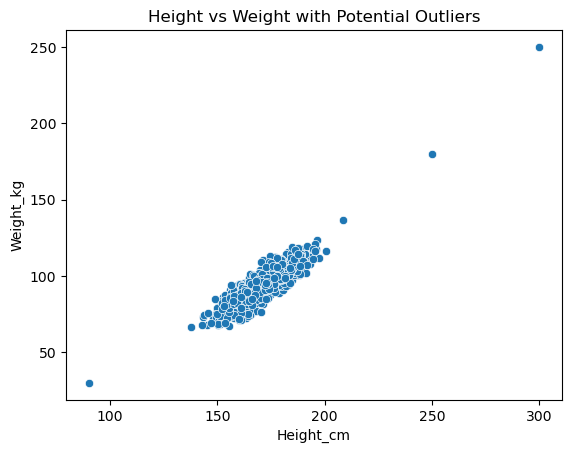

In [11]:
sns.scatterplot(x='Height_cm', y='Weight_kg', data=df)
plt.title('Height vs Weight with Potential Outliers')
plt.show()

In [12]:
#Remove the outliers using the z score 
from scipy.stats import zscore

z_score = zscore(df[['Height_cm', 'Weight_kg']])
df_clean = df[(abs(z_score) < 3).all(axis=1)]

In [13]:
df.head(10)

,Height_cm,Weight_kg,Gender,Age_Group
0,174.400145,110.181847,Female,Senior
1,163.230780,89.377853,Other,Adult
2,165.655038,80.073836,Other,Adult
3,169.544140,98.219977,Female,Senior
4,155.925362,85.004426,Male,Senior
5,183.054788,104.801072,Male,Adult
6,185.295503,102.534170,Male,Teen
7,183.071428,93.798114,Other,Adult
8,170.286123,84.170177,Male,Adult
9,162.262108,86.649249,Female,Adult


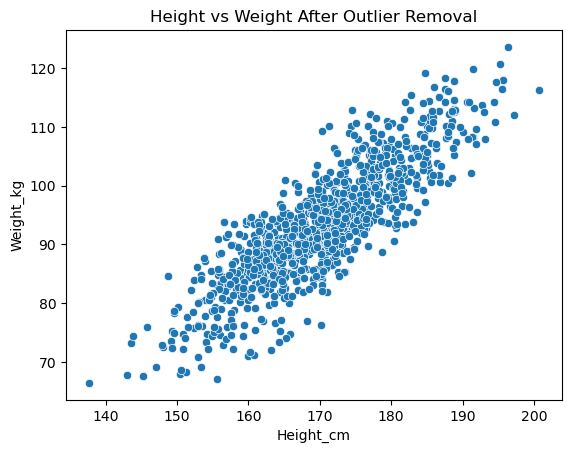

In [14]:
sns.scatterplot(x='Height_cm', y='Weight_kg', data=df_clean)
plt.title('Height vs Weight After Outlier Removal')
plt.show()

In [15]:
#Train the model 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
x = df_clean[['Height_cm']]
y = df_clean['Weight_kg']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [17]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [18]:
#Checking the accuracy of the model 

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.7585922870992166
RMSE: 4.681224265570113


d:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


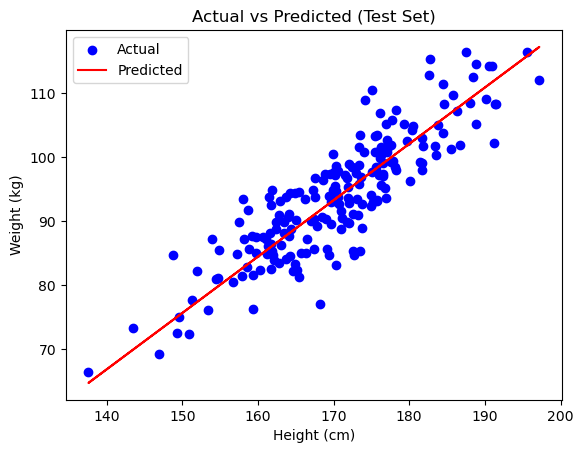

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, label="Actual", color='blue')
plt.plot(x_test, y_pred, label="Predicted", color='red')
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


In [20]:
#Test the model 
height = [[175]]  # must be 2D array
predicted_weight = model.predict(height)
print(f"Predicted Weight for 175 cm: {predicted_weight[0]:.2f} kg")

Predicted Weight for 175 cm: 97.67 kg


d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
height = [[160]]  # must be 2D array
predicted_weight = model.predict(height)
print(f"Predicted Weight for 175 cm: {predicted_weight[0]:.2f} kg")

Predicted Weight for 175 cm: 84.47 kg


d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
